In [4]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
base_merge = pd.read_csv('Actividad xenofobia.csv')
base_merge

,Date,Count
0,2020-04-01 00:00:00,0
1,2020-04-02 00:00:00,0
2,2020-04-03 00:00:00,0
3,2020-04-04 00:00:00,0
4,2020-04-05 00:00:00,0
...,...,...
361,2021-03-28 00:00:00,61
362,2021-03-29 00:00:00,49
363,2021-03-30 00:00:00,61
364,2021-03-31 00:00:00,42


In [6]:
base_merge.rename(columns={"Date": "Fecha", "Count": "Volumen"}, inplace = True)
base_merge['Fecha'] = pd.to_datetime(base_merge['Fecha'])
base_merge['Mes'] = base_merge['Fecha'].dt.strftime('%b %Y')
base_merge['Semana'] = base_merge['Fecha'].dt.dayofweek
base_merge["Fecha Semanal"] = base_merge["Semana"].astype(str) + base_merge["Mes"].astype(str)
base_merge

,Fecha,Volumen,Mes,Semana,Fecha Semanal
0,2020-04-01,0,Apr 2020,2,2Apr 2020
1,2020-04-02,0,Apr 2020,3,3Apr 2020
2,2020-04-03,0,Apr 2020,4,4Apr 2020
3,2020-04-04,0,Apr 2020,5,5Apr 2020
4,2020-04-05,0,Apr 2020,6,6Apr 2020
...,...,...,...,...,...
361,2021-03-28,61,Mar 2021,6,6Mar 2021
362,2021-03-29,49,Mar 2021,0,0Mar 2021
363,2021-03-30,61,Mar 2021,1,1Mar 2021
364,2021-03-31,42,Mar 2021,2,2Mar 2021


In [31]:
months = ["Apr 2020", "May 2020", "Jun 2020", 
          "Jul 2020", "Aug 2020", "Sep 2020", "Oct 2020", "Nov 2020", "Dec 2020", "Jan 2021", "Feb 2021", "Mar 2021", "Apr 2021" ]
diagramación = pd.DataFrame( base_merge[["Fecha", "Volumen", "Mes"]])
diagramación = pd.DataFrame(diagramación.groupby(diagramación['Mes'])['Volumen'].sum())
diagramación.reset_index(inplace=True)
diagramación['Mes'] = pd.Categorical(diagramación['Mes'], categories=months, ordered=True)
diagramación.sort_values(inplace=True, by="Mes")
diagramación.to_excel("Base_Diagramación_Salvador.xlsx")
diagramación.head()

,Mes,Volumen
0,Apr 2020,418
9,May 2020,1192
7,Jun 2020,1458
6,Jul 2020,829
2,Aug 2020,738


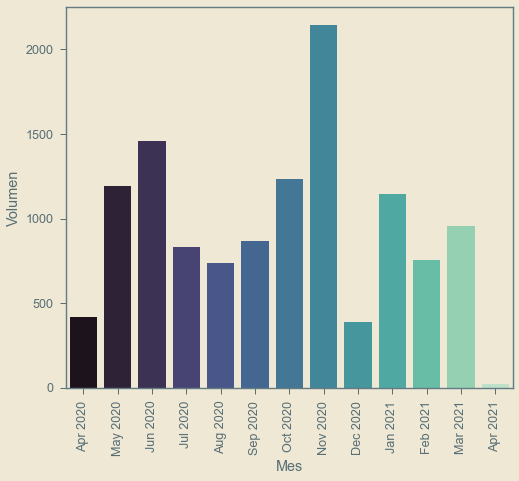

In [32]:
g = sns.barplot(x = 'Mes', y = 'Volumen', data = base_merge[['Mes', 'Volumen']], estimator=sum, ci=None, palette = "mako")
for item in g.get_xticklabels():
    item.set_rotation(90)

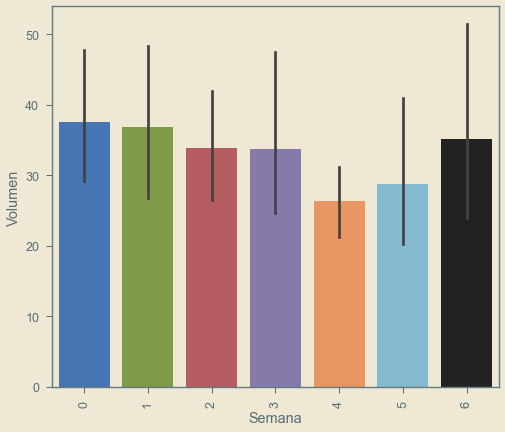

In [33]:
g = sns.barplot(x = 'Semana', y = 'Volumen', data = base_merge[['Semana', 'Volumen']])
for item in g.get_xticklabels():
    item.set_rotation(90)

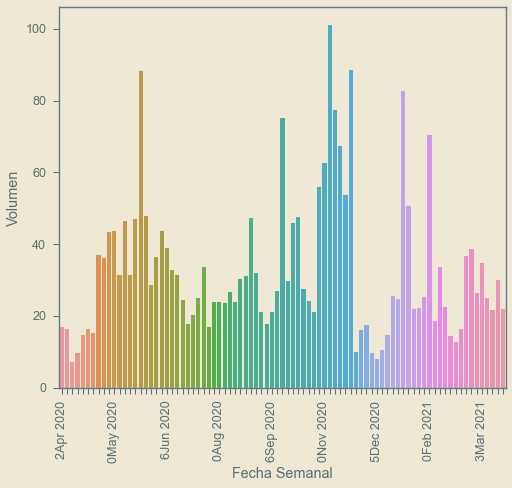

In [34]:
g = sns.barplot(x = 'Fecha Semanal', y = 'Volumen', data = base_merge[['Fecha Semanal', 'Volumen']], ci = None)
for item in g.get_xticklabels():
    item.set_rotation(90)
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [35]:
path = r'C:\Users\JOSE\Desktop\OIM\El Salvador\Topico_dominante_por_frase_snippet.xlsx'
base = pd.read_excel(path)

base['Text'] = base['Text'].str.lower()

base.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0,0.9711,"hondureño, no, chapines, tener, hondureños, pa...",yo siempre pensé que el cara de nuegado era es...
1,1,1,0,0.8428,"hondureño, no, chapines, tener, hondureños, pa...","veneco lacra, a todas luces"
2,2,2,0,0.9478,"hondureño, no, chapines, tener, hondureños, pa...","sabes que es lo peor, que esos cerotes chapin..."
3,3,3,0,0.9123,"hondureño, no, chapines, tener, hondureños, pa...",mi no entender esa vieja chapina. estar loco ...
4,4,4,0,0.9569,"hondureño, no, chapines, tener, hondureños, pa...",#internacionales | la ong hondureña jóvenes co...


In [36]:
base['venezolano'] = base.Text.str.findall(r'(veneco|veneca|venezolan|cham)[A-Za-z]*')
base['venezolano'] = base.venezolano.map(lambda x: x!=[])
base['venezolano'] = np.where(base['venezolano'], 1, 0)

base['nicaraguenses'] = base.Text.str.findall(r'(nica|nicaraguense)[A-Za-z]*')
base['nicaraguenses'] = base.nicaraguenses.map(lambda x: x!=[])
base['nicaraguenses'] = np.where(base['nicaraguenses'], 1, 0)

base['guatemalteco'] = base.Text.str.findall(r'(chapin|chapín|chapina|guatemalteco|guatemalteca)[A-Za-z]*')
base['guatemalteco'] = base.guatemalteco.map(lambda x: x!=[])
base['guatemalteco'] = np.where(base['guatemalteco'], 1, 0)

base['hondureño'] = base.Text.str.findall(r'(catracho|hondureño|hondureña|catracha)[A-Za-z]*')
base['hondureño'] = base.hondureño.map(lambda x: x!=[])
base['hondureño'] = np.where(base['hondureño'], 1, 0)

base['sd'] = np.where((base['hondureño']==0) & (base['venezolano']==0) & (base['nicaraguenses']==0) & (base['guatemalteco']==0), 1, 0)

base.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,venezolano,nicaraguenses,guatemalteco,hondureño,sd
0,0,0,0,0.9711,"hondureño, no, chapines, tener, hondureños, pa...",yo siempre pensé que el cara de nuegado era es...,0,0,1,0,0
1,1,1,0,0.8428,"hondureño, no, chapines, tener, hondureños, pa...","veneco lacra, a todas luces",1,0,0,0,0
2,2,2,0,0.9478,"hondureño, no, chapines, tener, hondureños, pa...","sabes que es lo peor, que esos cerotes chapin...",0,0,1,0,0
3,3,3,0,0.9123,"hondureño, no, chapines, tener, hondureños, pa...",mi no entender esa vieja chapina. estar loco ...,0,0,1,0,0
4,4,4,0,0.9569,"hondureño, no, chapines, tener, hondureños, pa...",#internacionales | la ong hondureña jóvenes co...,0,0,0,1,0


In [37]:
base = base.describe()[['venezolano', 'guatemalteco', 'hondureño', 'nicaraguenses', 'sd']].reset_index()
base = base.loc[base['index'] == 'mean']

base

,index,venezolano,guatemalteco,hondureño,nicaraguenses,sd
1,mean,0.056892,0.245895,0.592784,0.073501,0.111493


In [38]:
base = base.T.reset_index(drop=True)
base['Nacionalidad'] = ['Nacionalidad', 'Venezolanos', 'Guatemalteco', 'Hondureño', 'Nicaragüense', 'Migración general y \n \n otras nacionalidades']

base.columns = ['Volumen (%)', 'Nacionalidad']
base = base.iloc[1:,:]
base['Volumen (%)'] = base['Volumen (%)']*100

base

,Volumen (%),Nacionalidad
1,5.689194,Venezolanos
2,24.589538,Guatemalteco
3,59.278351,Hondureño
4,7.350134,Nicaragüense
5,11.149294,Migración general y \n \n otras nacionalidades


In [39]:
base.to_excel("Base_Nacionalidades.xlsx")

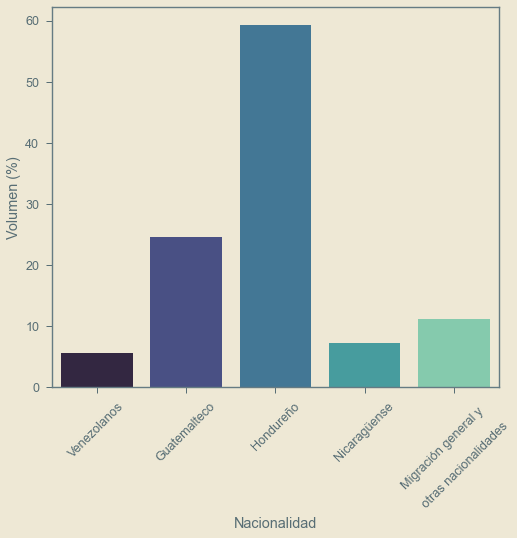

In [29]:
g = sns.barplot(x = 'Nacionalidad', y = 'Volumen (%)', data = base, palette = "mako")
for item in g.get_xticklabels():
    item.set_rotation(45)

In [ ]:
base[base['sd']==1]['Text']

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Venezolanos', 'Haitianos', 'Nicaragüenses', "Migración general y otras nacionalidades"
sizes = list(base.iloc[0, 1:])
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=270, colors = ['plum', 'yellowgreen', 'blue', 'sandybrown'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig.savefig('/Users/diegoalejandrobermudezsierra/OneDrive - Universidad de los Andes/BX/OIM/Republica Dominicana/Nacionalidades.jpeg', bbox_inches='tight')

plt.show()